# Import package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.linear_model import LogisticRegression, LinearRegression

# Linear Regression

## Preprocess

In [ ]:
data = pd.read_csv("./linear.csv")

In [ ]:
data.shape

(30, 3)

In [ ]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


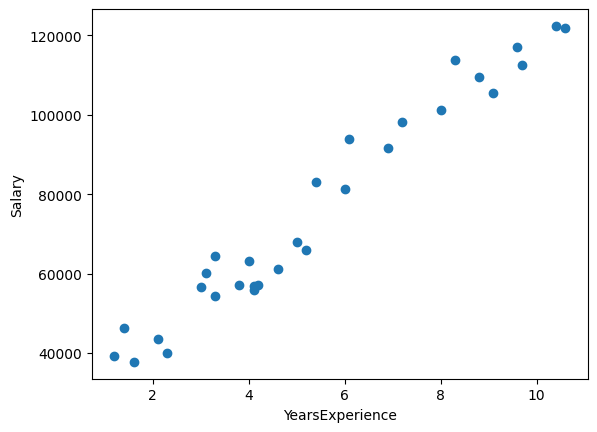

In [ ]:
def plotline(X, y, weight):
  plt.scatter(x=y, y=X)
  plt.plot(weight[0] + weight[1] * X, X, c="r")
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.show()

def plot(X, y, y_pred):
  plt.scatter(y=X, x=y)
  plt.plot(y_pred, X, c="r")
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.show()

def plotData(X, y):
  plt.scatter(X, y)
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.show()

plotData(data.iloc[:, -2], data.iloc[:, -1])

In [ ]:
X = data.iloc[:, -1].values
y = data.iloc[:, -2].values

## Toán học


In [ ]:
def weightLinear(X, y):
  one = np.ones((X.shape[0], 1))
  X = X.reshape(-1, 1)
  y = y.reshape(-1, 1)
  X = np.hstack((one, X))
  w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return w

In [ ]:
weight = weightLinear(X, y)

In [ ]:
weight

array([[-2.28326183e+00],
       [ 1.01265659e-04]])

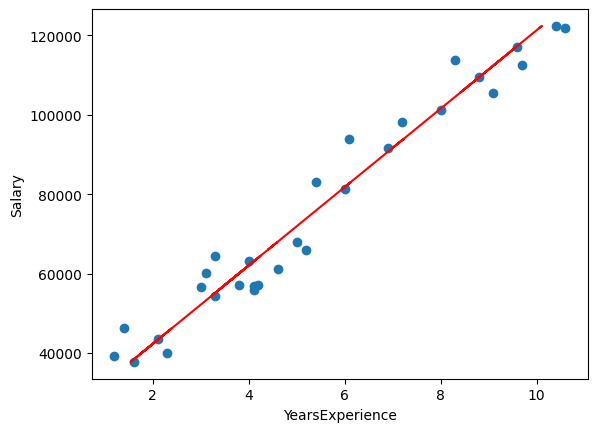

In [ ]:
plotline( X, y, weight)

## Gradient decent

In [ ]:
X_train = (X - X.mean()) / X.std()

In [ ]:
from tqdm import tqdm
def grad(weight, X, y):
  return X.T @ (X @ weight - y)

def train(X, y, threshold, lr, epochs):
  tmp = X.copy()
  one = np.ones((X.shape[0], 1))
  X = X.reshape(-1, 1)
  y = y.reshape(-1, 1)
  X = np.hstack((one, X))
  weight = np.zeros((X.shape[1], 1))
  for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    gr = grad(weight, X, y)
    if abs(gr[0][0]) < threshold:
      break
    weight = weight - lr * gr
    y_pred = weight[0] + weight[1] * tmp
    plot(tmp, y, y_pred)
  print("weight:", weight)
  return weight

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0


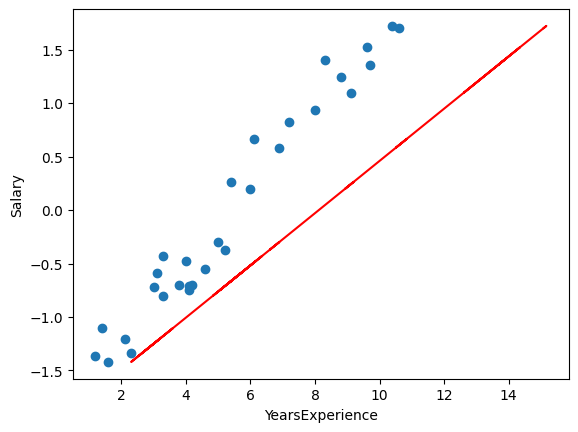

  4%|▍         | 1/25 [00:00<00:19,  1.26it/s]

Epoch: 1


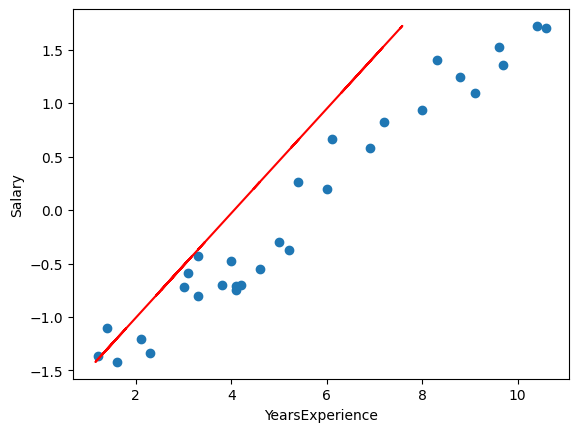

  8%|▊         | 2/25 [00:01<00:19,  1.19it/s]

Epoch: 2


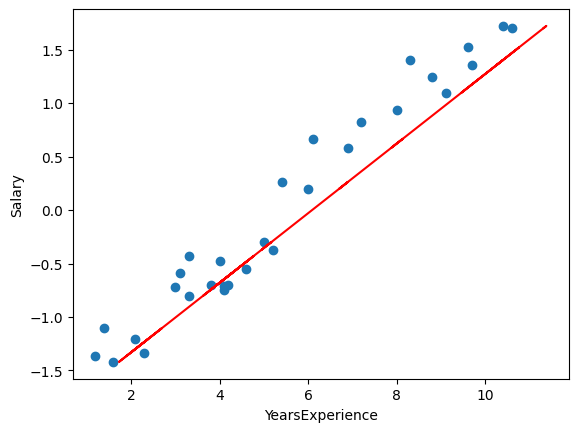

 12%|█▏        | 3/25 [00:01<00:12,  1.72it/s]

Epoch: 3


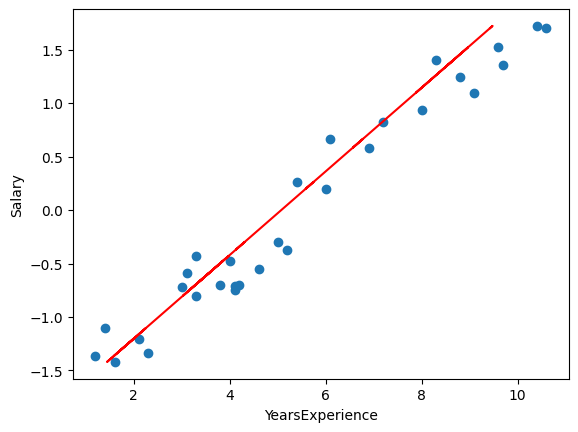

 16%|█▌        | 4/25 [00:02<00:09,  2.25it/s]

Epoch: 4


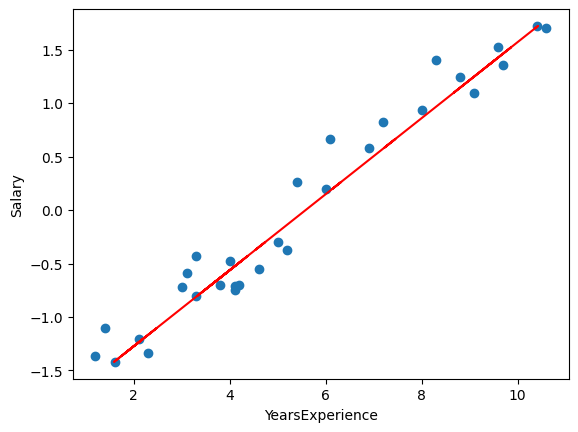

 20%|██        | 5/25 [00:02<00:07,  2.62it/s]

Epoch: 5


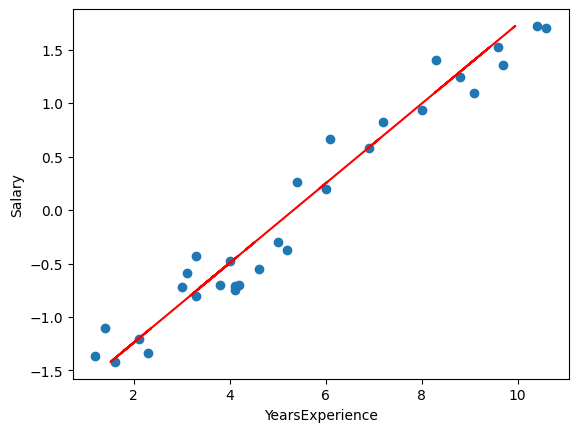

 24%|██▍       | 6/25 [00:02<00:06,  3.01it/s]

Epoch: 6


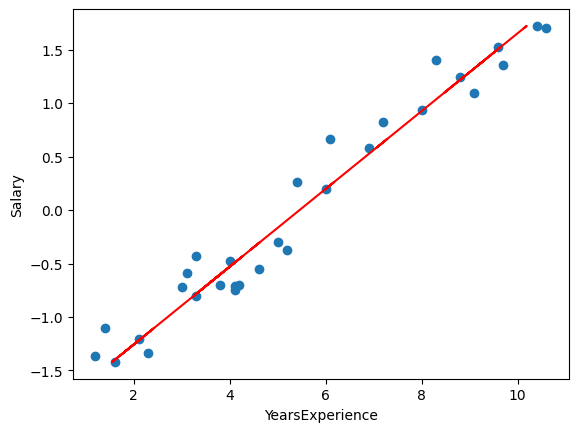

 28%|██▊       | 7/25 [00:02<00:05,  3.33it/s]

Epoch: 7


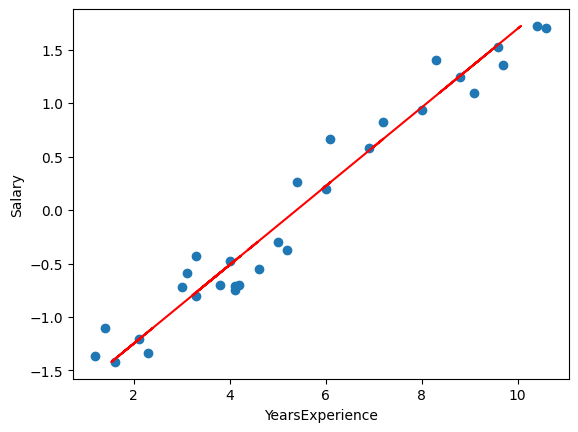

 32%|███▏      | 8/25 [00:03<00:04,  3.64it/s]

Epoch: 8


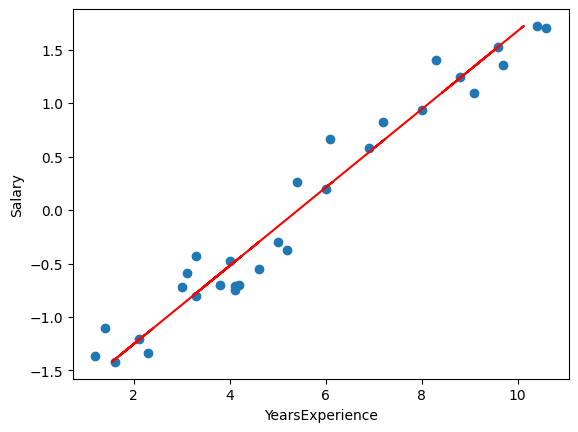

 36%|███▌      | 9/25 [00:03<00:04,  3.75it/s]

Epoch: 9


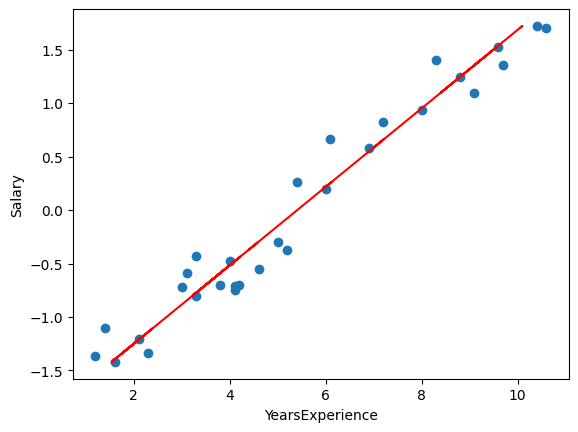

 40%|████      | 10/25 [00:03<00:03,  3.81it/s]

Epoch: 10


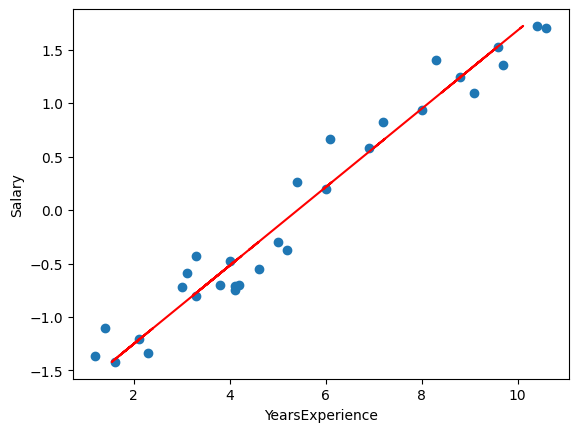

 44%|████▍     | 11/25 [00:03<00:03,  4.02it/s]

Epoch: 11


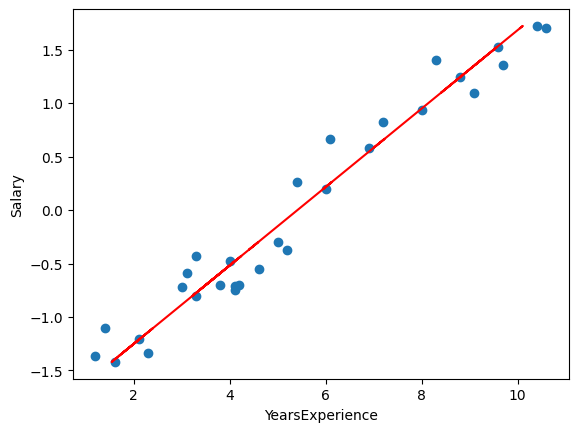

 48%|████▊     | 12/25 [00:04<00:03,  4.09it/s]

Epoch: 12


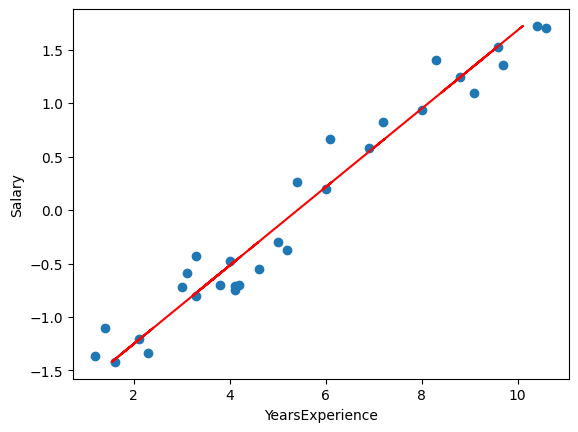

 52%|█████▏    | 13/25 [00:04<00:02,  4.24it/s]

Epoch: 13


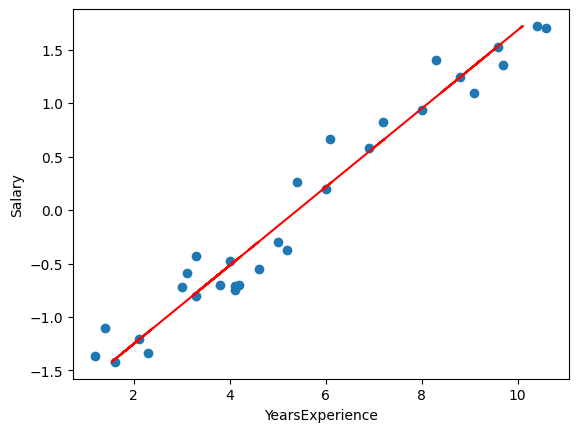

 56%|█████▌    | 14/25 [00:04<00:02,  4.19it/s]

Epoch: 14


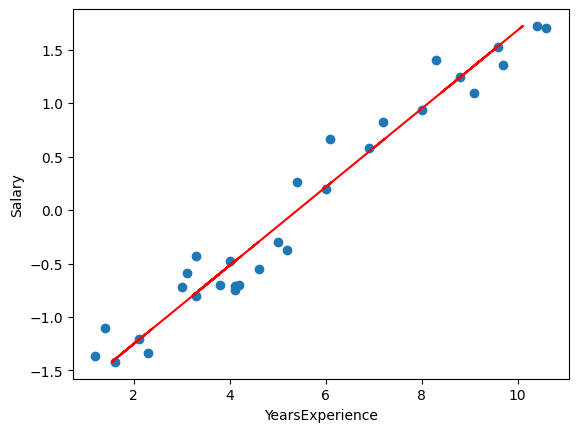

 60%|██████    | 15/25 [00:04<00:02,  4.22it/s]

Epoch: 15


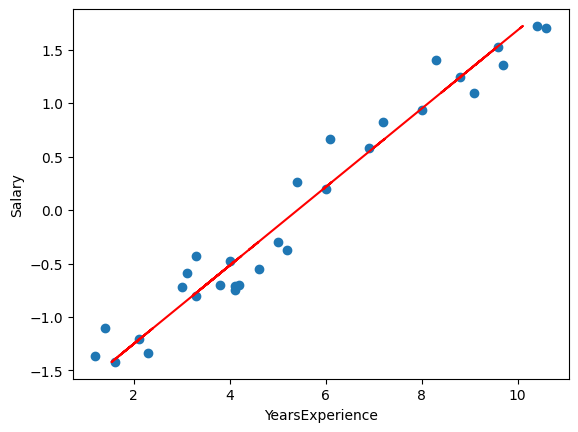

 64%|██████▍   | 16/25 [00:05<00:02,  4.08it/s]

Epoch: 16


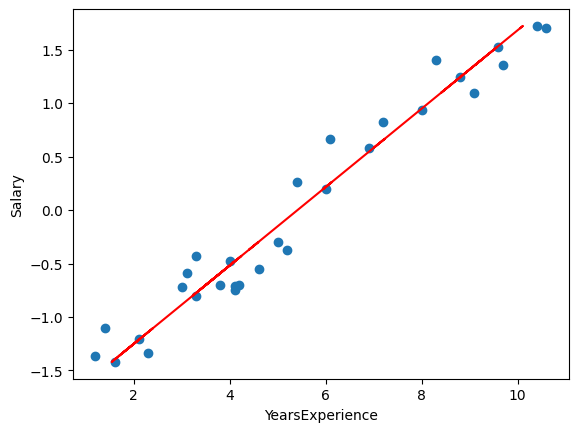

 68%|██████▊   | 17/25 [00:05<00:01,  4.05it/s]

Epoch: 17


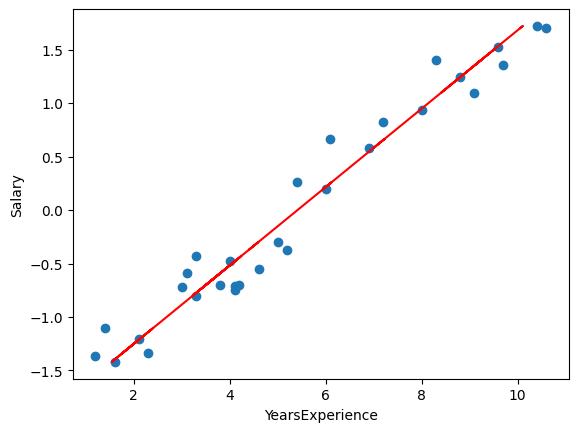

 72%|███████▏  | 18/25 [00:05<00:01,  3.83it/s]

Epoch: 18


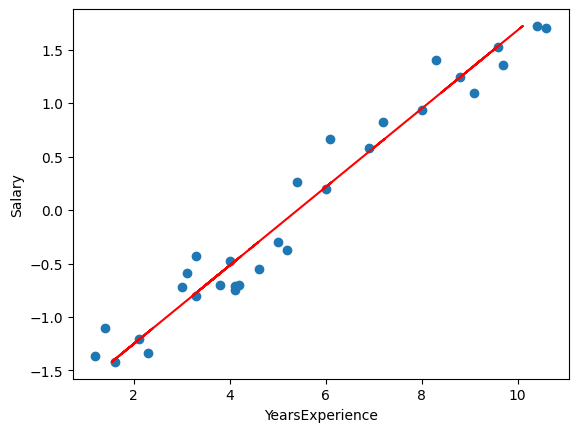

 76%|███████▌  | 19/25 [00:05<00:01,  3.88it/s]

Epoch: 19


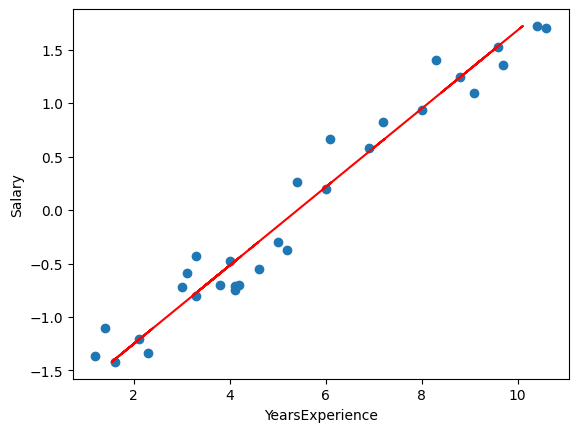

 80%|████████  | 20/25 [00:06<00:01,  3.89it/s]

Epoch: 20


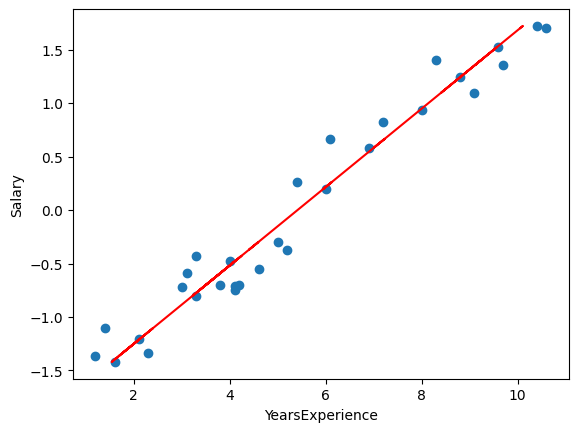

 84%|████████▍ | 21/25 [00:06<00:01,  3.92it/s]

Epoch: 21


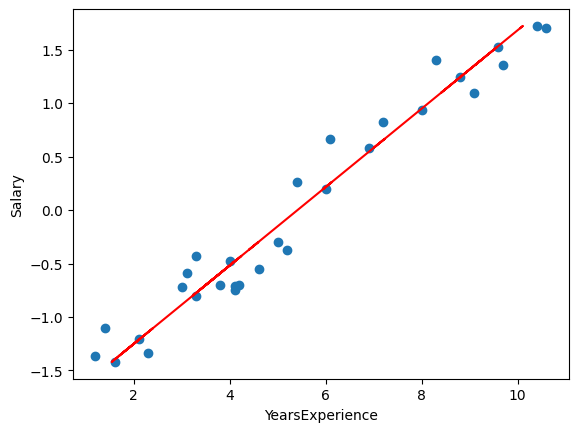

 88%|████████▊ | 22/25 [00:06<00:00,  3.82it/s]

Epoch: 22


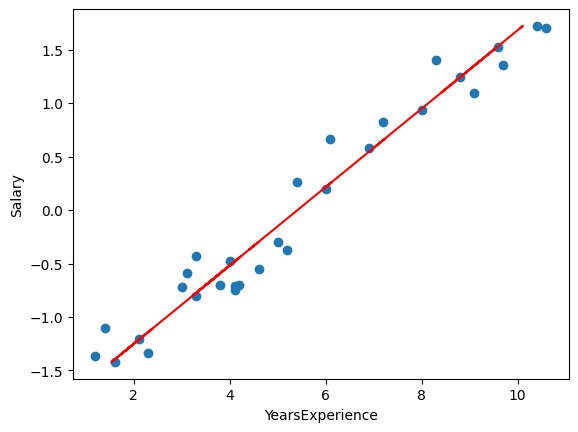

 92%|█████████▏| 23/25 [00:06<00:00,  3.86it/s]

Epoch: 23


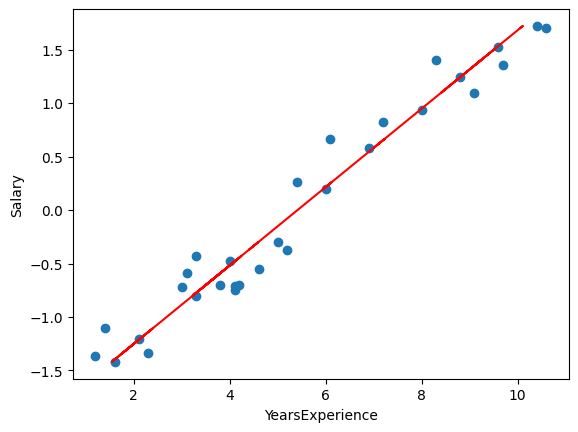

 96%|█████████▌| 24/25 [00:07<00:00,  3.37it/s]

Epoch: 24
weight: [[5.41333301]
 [2.729479  ]]


In [ ]:
weightgrad = train(X=X_train,
      y=y,
      threshold=1e-5,
      lr=0.05,
      epochs=25)

In [ ]:
weightgrad

array([[5.41333301],
       [2.729479  ]])

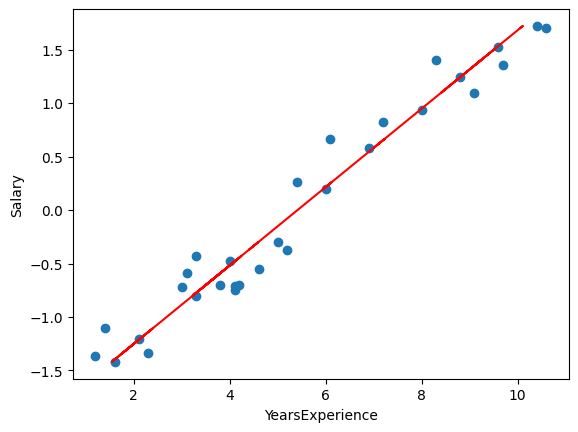

In [ ]:
plotline(X_train, y, weightgrad)

## Pytorch

In [ ]:
import torch
class LinearRegression(torch.nn.Module):
  def __init__(self) -> None:
    super(LinearRegression, self).__init__()
    self.weight = torch.nn.Parameter(data=torch.rand(1), requires_grad=True)
    self.bias = torch.nn.Parameter(data=torch.rand(1), requires_grad=True)

  def forward(self, x):
    return self.weight * x + self.bias

In [ ]:
def trainLR(X, y, epoch):
  model = LinearRegression()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
  loss_fn = torch.nn.MSELoss()
  for epoch in tqdm(range(epoch)):
    model.train()
    optimizer.zero_grad()
    y_pred = model(torch.tensor(X))
    loss = loss_fn(y_pred, torch.tensor(y))
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch}, loss: {loss.item()}")
    if epoch % 5 == 0:
      model.eval()
      with torch.no_grad():
        y_pred = model(torch.tensor(X_train)).numpy()
        plot(X, y, y_pred)
  return model

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, loss: 27.136222113559352


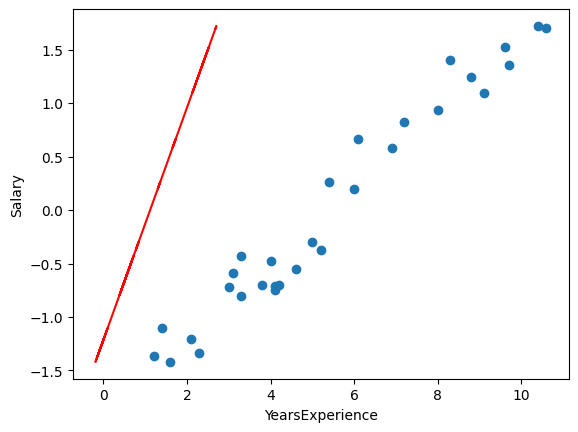

  2%|▏         | 1/50 [00:00<00:13,  3.66it/s]

Epoch: 1, loss: 22.04400870276824
Epoch: 2, loss: 17.919316408171028
Epoch: 3, loss: 14.578314784059284
Epoch: 4, loss: 11.872103662486769
Epoch: 5, loss: 9.680072444774677


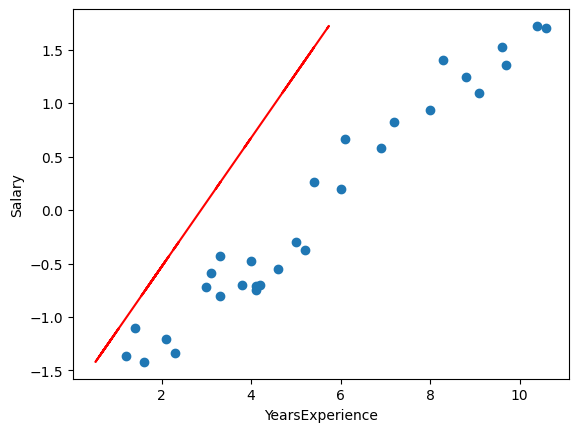

 12%|█▏        | 6/50 [00:00<00:03, 13.05it/s]

Epoch: 6, loss: 7.904527326506722
Epoch: 7, loss: 6.4663353000425365
Epoch: 8, loss: 5.301400576852592
Epoch: 9, loss: 4.357803411739244
Epoch: 10, loss: 3.5934897458881108


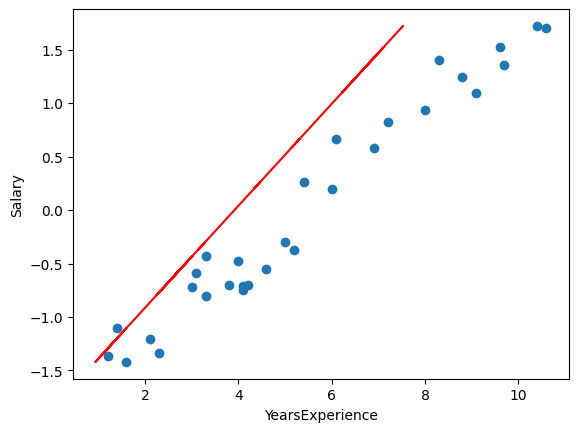

 22%|██▏       | 11/50 [00:00<00:02, 16.56it/s]

Epoch: 11, loss: 2.9743953411522814
Epoch: 12, loss: 2.4729289348157564
Epoch: 13, loss: 2.0667416927704183
Epoch: 14, loss: 1.737729331434405
Epoch: 15, loss: 1.4712298133969621


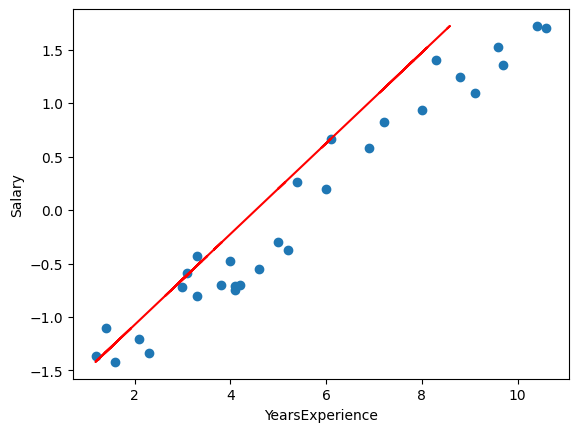

 32%|███▏      | 16/50 [00:00<00:01, 18.78it/s]

Epoch: 16, loss: 1.255365127283652
Epoch: 17, loss: 1.0805148237649769
Epoch: 18, loss: 0.9388855750050422
Epoch: 19, loss: 0.824166193664648
Epoch: 20, loss: 0.7312435416417471


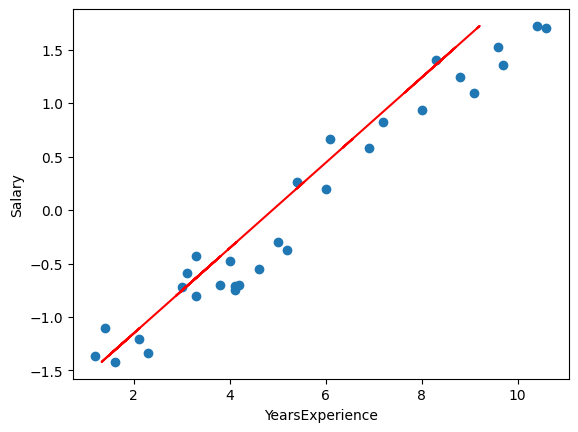

 42%|████▏     | 21/50 [00:01<00:01, 19.19it/s]

Epoch: 21, loss: 0.6559762435362265
Epoch: 22, loss: 0.5950096555091637
Epoch: 23, loss: 0.5456268071411915
Epoch: 24, loss: 0.5056264390602325
Epoch: 25, loss: 0.4732262727001987


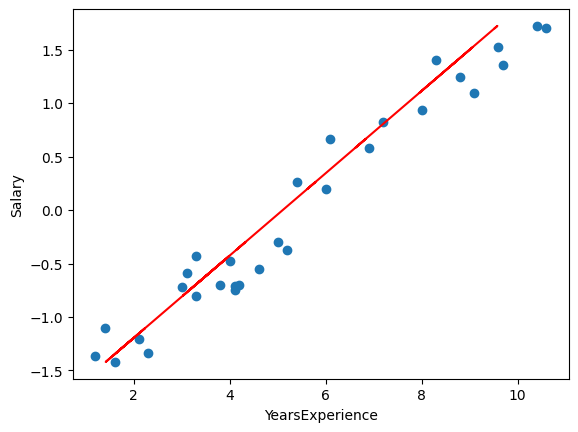

 52%|█████▏    | 26/50 [00:01<00:01, 19.82it/s]

Epoch: 26, loss: 0.44698196427209863
Epoch: 27, loss: 0.42572423178683994
Epoch: 28, loss: 0.40850544784047343
Epoch: 29, loss: 0.39455829624610605
Epoch: 30, loss: 0.383260978562666


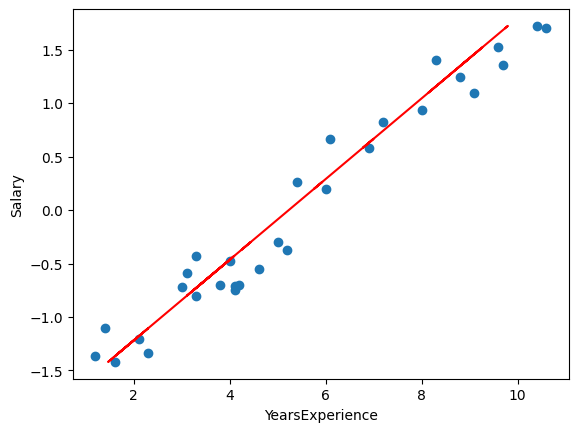

 62%|██████▏   | 31/50 [00:01<00:00, 19.08it/s]

Epoch: 31, loss: 0.3741101548767706
Epoch: 32, loss: 0.36669800193236674
Epoch: 33, loss: 0.36069423072752294
Epoch: 34, loss: 0.35583119602280805
Epoch: 35, loss: 0.35189211525407144


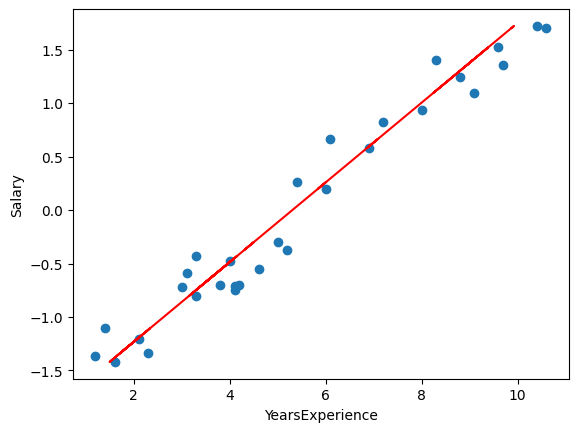

 72%|███████▏  | 36/50 [00:02<00:00, 19.16it/s]

Epoch: 36, loss: 0.3487014487921769
Epoch: 37, loss: 0.3461170333905553
Epoch: 38, loss: 0.34402365054530776
Epoch: 39, loss: 0.3423280175577705
Epoch: 40, loss: 0.3409544834049921


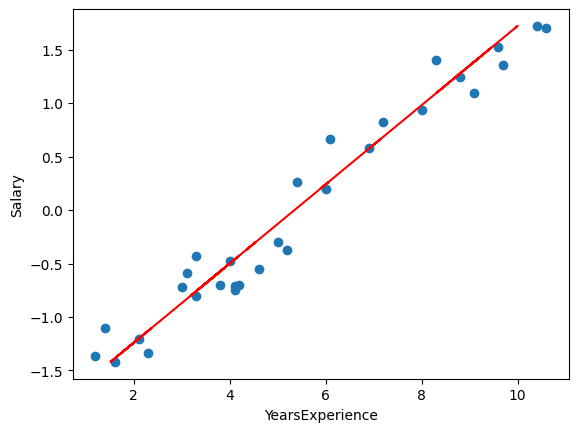

 82%|████████▏ | 41/50 [00:02<00:00, 19.16it/s]

Epoch: 41, loss: 0.3398419629309642
Epoch: 42, loss: 0.3389408273308787
Epoch: 43, loss: 0.3382108928390321
Epoch: 44, loss: 0.3376196477285886
Epoch: 45, loss: 0.33714073186938986


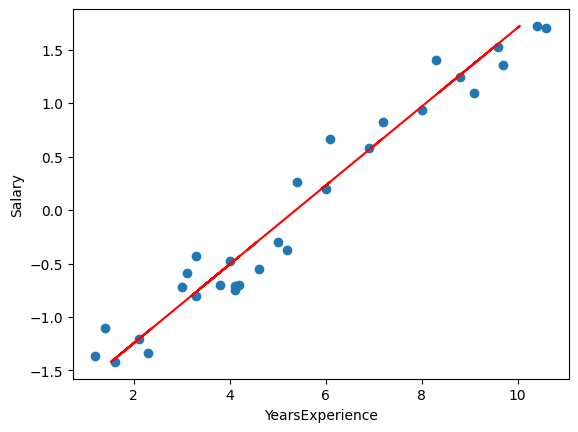

100%|██████████| 50/50 [00:02<00:00, 19.49it/s]

Epoch: 46, loss: 0.3367528312365772
Epoch: 47, loss: 0.33643862453425705
Epoch: 48, loss: 0.3361841113465537
Epoch: 49, loss: 0.33597794657990554


In [ ]:
model = trainLR(X=X_train,
        y=y,
        epoch=50)

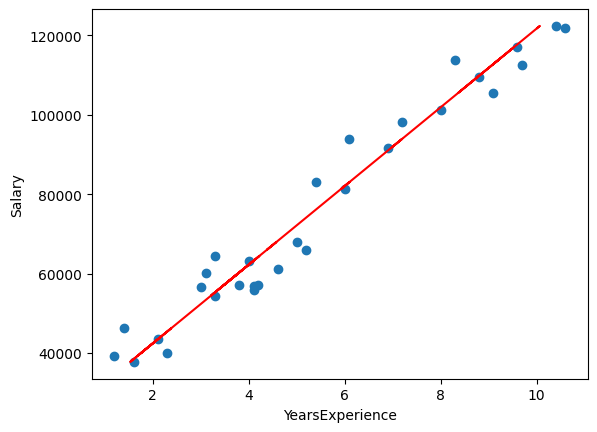

In [ ]:
model.eval()
with torch.no_grad():
  y_pred = model(torch.tensor(X_train)).numpy()
  plot(X, y, y_pred)

## Sklearn

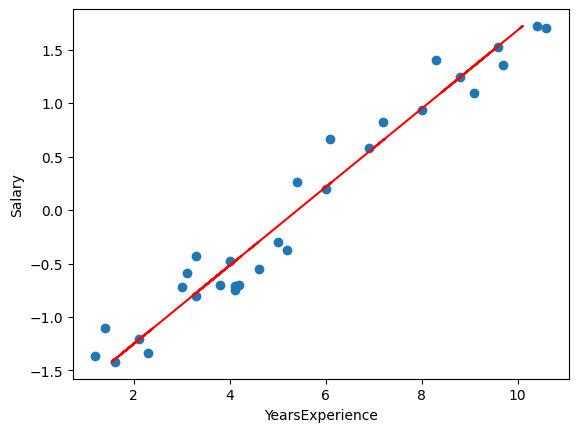

In [ ]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y)
y_pred = model.predict(X_train.reshape(-1, 1))
plot(X_train, y, y_pred)

# Logistic regression

##  Preprocess

In [ ]:
data_logis = pd.read_csv("./logistic.csv")
data_logis['y'] = data_logis.iloc[:, 2].to_numpy(dtype=np.int8)

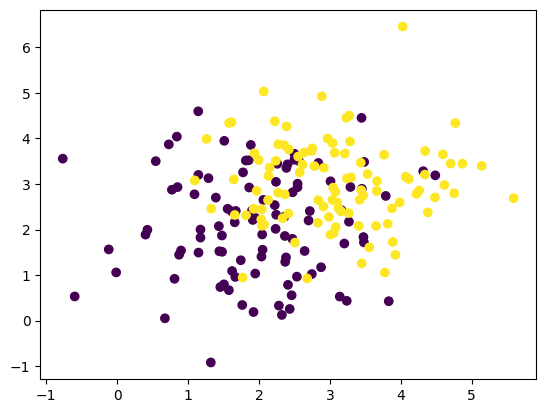

In [ ]:
plt.scatter(data_logis.iloc[:, 0], data_logis.iloc[:, 1], c=data_logis.iloc[:, 2])
plt.show()

## Gradient decent

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
def weightLogistic(X, y, lr, epochs):
  one = np.ones((X.shape[0], 1))
  X = X.reshape(-1, X.shape[1])
  y = y.reshape(-1, 1)
  X = np.hstack((one, X))
  w = np.zeros((X.shape[1], 1))
  for epoch in tqdm(range(epochs)):
    for i in range(X.shape[0]):
      y_pred = sigmoid(X[i, :] @ w)
      grad = (y_pred - y[i]) * X[i, :]
      w = w - lr * grad.reshape(-1, 1)
  return w

In [ ]:
X_logis = data_logis.iloc[:, :-1].to_numpy()
y_logis = data_logis.iloc[:, -1].to_numpy(dtype=np.int8)

In [ ]:
w =  weightLogistic(X=X_logis,
                    y=y_logis,
                    lr=0.00005,
                    epochs=1000)

100%|██████████| 1000/1000 [00:04<00:00, 232.58it/s]


In [ ]:
one = np.ones((X_logis.shape[0], 1))
X_logis = np.hstack((one, X_logis))
y_pred = sigmoid(X_logis @ w)

In [ ]:
y_pred = (y_pred > 0.5).astype(np.int8)

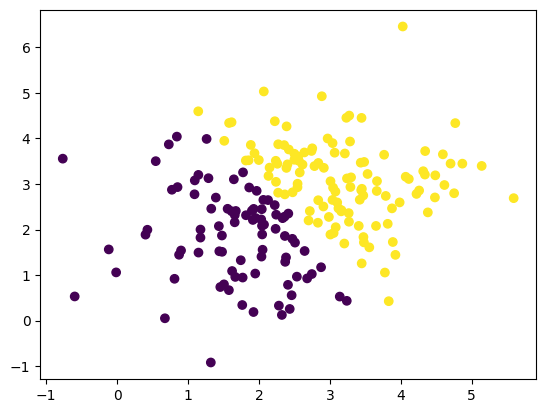

In [ ]:
plt.scatter(data_logis.iloc[:, 0], data_logis.iloc[:, 1], c=y_pred)
plt.show()

In [ ]:
from collections import Counter
Counter(y_pred.squeeze())

Counter({1: 135, 0: 65})

## Sklearn

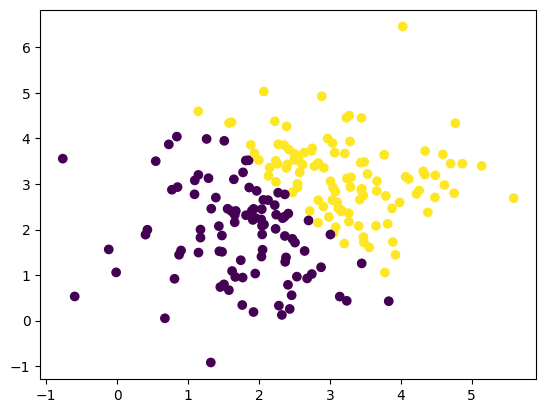

In [ ]:
model = LogisticRegression()
model.fit(X_logis, y_logis)
y_pred = model.predict(X_logis)
plt.scatter(data_logis.iloc[:, 0], data_logis.iloc[:, 1], c=y_pred)
plt.show()